<a href="https://colab.research.google.com/github/SimonOuellet/pythonM2-2024/blob/leprof/ds_jobs_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model  import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.manifold import TSNE

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [5]:
df_dsjobs = pd.read_csv('https://raw.githubusercontent.com/SimonOuellet/pythonM2-2024/leprof/data/jobs_in_data.csv')

In [ ]:
df_dsjobs.drop_duplicates(inplace=True)
df_dsjobs.duplicated().sum()  # check again the duplicates

In [ ]:
df_dsjobs['salary_group'] = np.nan
df_dsjobs.loc[df_dsjobs['salary_in_usd'] <= 50000, 'salary_group'] = 'Salary <50000'
df_dsjobs.loc[(df_dsjobs['salary_in_usd'] > 50000) & (df_dsjobs['salary_in_usd'] <= 100000), 'salary_group'] = 'Salary >50000 and <100000'
df_dsjobs.loc[(df_dsjobs['salary_in_usd'] > 100000) & (df_dsjobs['salary_in_usd'] <= 150000), 'salary_group'] = 'Salary >100000 and <150000'
df_dsjobs.loc[(df_dsjobs['salary_in_usd'] > 150000) & (df_dsjobs['salary_in_usd'] <= 200000), 'salary_group'] = 'Salary >150000 and <200000'
df_dsjobs.loc[(df_dsjobs['salary_in_usd'] > 200000) & (df_dsjobs['salary_in_usd'] <= 250000), 'salary_group'] = 'Salary >200000 and <250000'
df_dsjobs.loc[(df_dsjobs['salary_in_usd'] > 250000) & (df_dsjobs['salary_in_usd'] <= 300000), 'salary_group'] = 'Salary >250000 and <300000'
df_dsjobs.loc[(df_dsjobs['salary_in_usd'] > 300000) & (df_dsjobs['salary_in_usd'] <= 350000), 'salary_group'] = 'Salary >300000 and <350000'
df_dsjobs.loc[df_dsjobs['salary_in_usd'] > 350000, 'salary_group'] = 'Salary >350000'

In [ ]:
df_dsjobs.columns

In [ ]:
df_X = df_dsjobs[['work_year', 'job_title', 'job_category', 'employee_residence', 'experience_level', 'company_location']]
df_y = df_dsjobs['salary_group']

In [ ]:
X = pd.get_dummies(df_X, sparse=True)
X.head()

In [ ]:
label = LabelEncoder()
y = label.fit_transform(df_y)
y

In [ ]:
df_y

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', n_iter=1000, perplexity=128, n_jobs=-1).fit_transform(X)

In [ ]:
# my_colors = ['#fffffd00','#fffffe00','#ffffff00','#fffffc00','#990000','#992222']
f=pd.DataFrame()
f['tsne-2d-one'] = X_embedded[:,0]
f['tsne-2d-two'] = X_embedded[:,1]
f['work_setting'] = df_dsjobs['work_setting']
plt.figure(figsize=(32,20))
s = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="work_setting",
    palette=sns.color_palette("hls", n_colors=df_dsjobs['work_setting'].nunique(dropna=True)),
    data=f,
    s=20,
    legend="full",
    alpha=1,
    edgecolors='none',
)
s.set_title("Jobs : work_setting")
plt.savefig("jobs.png")

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# List of classifiers
MLA = [

    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # Gaussian Processes
    #gaussian_process.GaussianProcessClassifier(),

    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    # Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    # SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),

    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    # Discriminant Analysis
    #LinearDiscriminantAnalysis(),
    #QuadraticDiscriminantAnalysis(),

    # xgboost
    #XGBClassifier()
]

# Create an empty list to store results
results = []

for classifier in MLA:
    model = classifier
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    train_time = round(end_time - start_time, 4)
    y_pred = model.predict(X_test)
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    results.append((classifier.__class__.__name__, acc, train_time))


results_df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy', 'Training Time'])
sorted_results = results_df.sort_values(by='Accuracy', ascending=False)

print(sorted_results)

                      Algorithm  Accuracy  Training Time
3    GradientBoostingClassifier     39.10        14.3560
5          LogisticRegressionCV     39.10        13.6980
7             RidgeClassifierCV     38.82         0.2842
2          ExtraTreesClassifier     37.79         1.2103
1             BaggingClassifier     36.95         0.2854
15       DecisionTreeClassifier     36.76         0.0738
16          ExtraTreeClassifier     36.58         0.0354
4        RandomForestClassifier     36.58         0.9703
10                  BernoulliNB     36.58         0.0569
12         KNeighborsClassifier     34.14         0.0268
13                          SVC     30.31        23.2710
0            AdaBoostClassifier     26.01         0.7257
6   PassiveAggressiveClassifier     23.29         0.3295
8                 SGDClassifier     23.29         3.0788
14                    LinearSVC     21.23         1.6022
11                   GaussianNB      6.27         0.0527
9                    Perceptron

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

gbc = ensemble.GradientBoostingClassifier()

grid_param = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [.01, .03, .05, .1, .25],
    'n_estimators': [10, 50, 100, 300],
    'max_depth': [2, 4, 6, 8, 10, None],
    'random_state': [42]
} #commented the other values to reduce runtime

best_search = GridSearchCV(gbc, grid_param, cv=5, scoring='accuracy')

best_search.fit(X_train, y_train)

best_gbc = best_search.best_estimator_
y_pred = best_gbc.predict(X_test)
acc_best_gbc = round(accuracy_score(y_pred, y_test) * 100, 2)

# Print the best parameters and accuracy
print("Best Parameters:", best_search.best_params_)
print("Accuracy of Best Model:", acc_best_gbc)

KeyboardInterrupt: 

In [ ]:
df_y.unique()

array(['Salary >50000 and <100000', 'Salary >150000 and <200000',
       'Salary >200000 and <250000', 'Salary >100000 and <150000',
       'Salary <50000', 'Salary >250000 and <300000',
       'Salary >300000 and <350000', 'Salary >350000'], dtype=object)

In [ ]:
model = linear_model.RidgeClassifierCV()
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

train_time = round(end_time - start_time, 4)
y_pred = model.predict(X_test)
acc = round(accuracy_score(y_test, y_pred) * 100, 2)
results.append((classifier.__class__.__name__, acc, train_time))

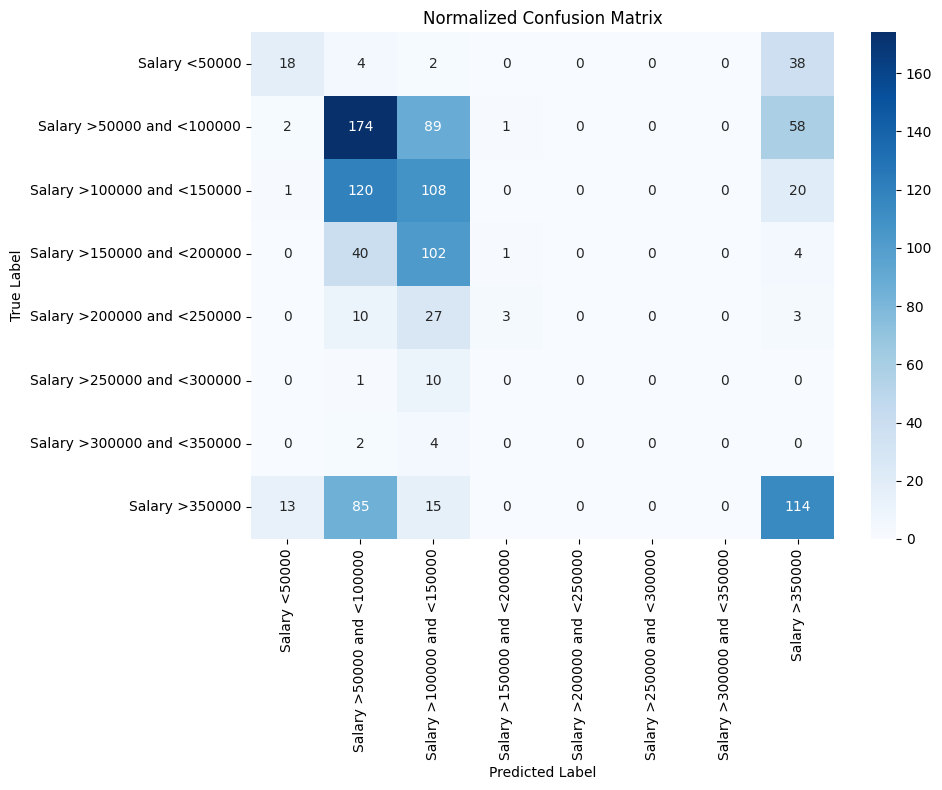

In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Salary <50000', 'Salary >50000 and <100000', 'Salary >100000 and <150000', 'Salary >150000 and <200000', 'Salary >200000 and <250000', 'Salary >250000 and <300000', 'Salary >300000 and <350000', 'Salary >350000']
#labels = df_y.unique()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()